In [1]:
# Import the numpy module to provide numerical functionality
import numpy as np

# Import the matplotlib.pyplot module to provide plotting functionality
import matplotlib.pyplot as plt

# Tell matplotlib.pyplot to do inline plots
%matplotlib inline

# Import the mesa-web module to simplify reading MESA-Web files

import mesa_web as mw

In [2]:
# Read history data. Be sure to replace the MMDDNNNNNN with the
# specific digits of your folder, and P with the profile index number

prof_data = mw.read_profile('MESA-Web_Job_1008205501/profile8.data')

# Inspect the prof_data variable

print(type(prof_data))
print(prof_data.keys())

<class 'dict'>
dict_keys(['model_number', 'num_zones', 'initial_mass', 'initial_z', 'star_age', 'time_step', 'Teff', 'photosphere_L', 'photosphere_r', 'center_eta', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'star_mass', 'star_mdot', 'star_mass_h1', 'star_mass_he3', 'star_mass_he4', 'star_mass_c12', 'star_mass_n14', 'star_mass_o16', 'star_mass_ne20', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'neutron_rich_core_mass', 'tau10_mass', 'tau10_radius', 'tau100_mass', 'tau100_radius', 'dynamic_time', 'kh_timescale', 'nuc_timescale', 'power_nuc_burn', 'power_h_burn', 'power_he_burn', 'power_neu', 'burn_min1', 'burn_min2', 'time_seconds', 'version_number', 'compiler', 'build', 'MESA_SDK_version', 'date', 'mass', 'radius', 'luminosity', 'pressure', 'logRho', 'logT', 'energy', 'entropy', 'cp', 'gamma1', 'grada', 'mu', 'free_e', 'ye', 'pgas', 'prad', 'gradr', 'gradT', 'velocity', 'conv_vel', 'opacity', 'eps_

In [3]:
# Print out documentation for the read_history function

help(mw.read_profile)

Help on function read_profile in module mesa_web:

read_profile(filename)
    Read data from a MESA-Web profile file
    
    Parameters
    ----------
    
    filename : string giving name of profile file
    
    Returns
    -------
    
    prof_data: dict containing header and profile data (see below for
               details)
    
    Header Data
    -----------
    
    The following keys/value pairs in the data dict contain header
    data -- i.e., scalars describing position-independent properties
    of the star. Where applicable, units are given in square brackets
    [].
    
      star_mdot              -- mass-loss rate [Msun/year]
      model_number           -- model number
      num_zones              -- number of zones
      initial_mass           -- initial mass [Msun]
      initial_z              -- initial metal mass fraction
      star_age               -- stellar age [years]
      time_step              -- current time-step [s]
      Teff                   -- ef

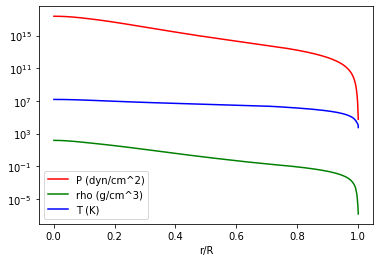

In [4]:
# Define constants

RSUN = 6.957E10 # Solar radius, in cm
MSUN = 1.989E33 # Solar mass, in g

# Plot pressure, density and temperature versus fractional radius

P = prof_data['pressure']
rho = 10**prof_data['logRho']
T = 10**prof_data['logT']

r = prof_data['radius']*RSUN        # Convert radii to cm
R = prof_data['photosphere_r']*RSUN # Same

plt.figure()

plt.plot(r/R, P, color='r', label='P (dyn/cm^2)')
plt.plot(r/R, rho, color='g', label='rho (g/cm^3)')
plt.plot(r/R, T, color='b', label='T (K)')

plt.xlabel('r/R')

plt.yscale('log')

plt.legend()

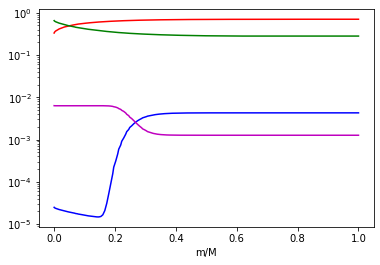

In [5]:
# Plot abundances versus fractional mass

X = prof_data['h1']
Y = prof_data['he4']
Z_C12 = prof_data['c12']
Z_N14 = prof_data['n14']

m = prof_data['mass']*MSUN      # Convert masses to g
M = prof_data['star_mass']*MSUN # Same

plt.figure()

plt.plot(m/M, X, color='r', label='X')
plt.plot(m/M, Y, color='g', label='Y')
plt.plot(m/M, Z_C12, color='b', label='Z_C12')
plt.plot(m/M, Z_N14, color='m', label='Z_N14')

plt.xlabel('m/M')

plt.yscale('log')


In [6]:
# Define constants

G = 6.674E-8

# Evaluate lhs and rhs of the hydrostatic equilibrium equation

lhs = np.gradient(P, r)

rhs = -G*m/r**2 * rho

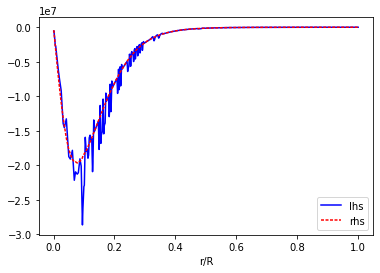

In [7]:
# Plot the lhs and rhs of the hydrostatic equilibrium equation

plt.figure()

plt.plot(r/R, lhs, color='b', label='lhs')
plt.plot(r/R, rhs, color='r', label='rhs', dashes=(2,1))

plt.xlabel('r/R')

plt.legend()